# Analyzing Monte Carlo Simulations

## Single Run Analysis

       net1          iout         idump      i_in  bit          diff
0  0.024306  4.288667e-14  1.007863e-06  0.000001    0           NaN
1  0.024273  1.893638e-08  9.889273e-07  0.000001    1  1.893634e-08
2  0.024262  2.337346e-08  9.844904e-07  0.000001    2  4.437076e-09
3  0.024238  3.626917e-08  9.715950e-07  0.000001    3  1.289571e-08
4  0.024245  3.278854e-08  9.750755e-07  0.000001    4 -3.480631e-09
real 1bit current:         1.89363821e-08
theoretical 1bit current:  7.8125e-09


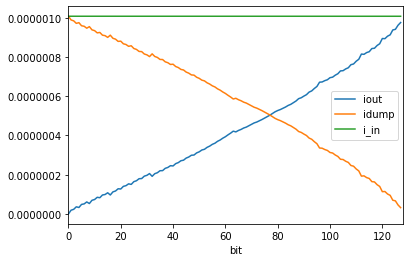

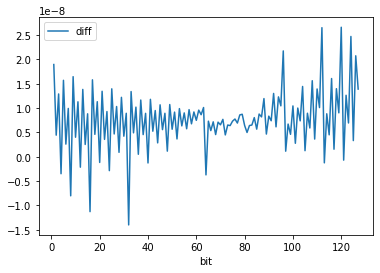

In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# load data
data = pd.read_csv("data/mc_dac1.txt", sep=" +", engine='python')
data.columns = ["net1", "iout", "idump", "i_in"]
data["bit"] = data.index

#generate current steps
data["diff"] = data["iout"].diff(1)

# print sample of dataframe
print(data.head())

# print expected 1bit transistion
print("real 1bit current:        ", data.iout[1])
print("theoretical 1bit current: ", 1e-6/128)


data.plot("bit", ["iout", "idump", "i_in"], xlim=(0,128))

data.plot("bit", "diff")

## Multi-Run Analysis

/home/madvlsi/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


       net1          iout     idump      i_in  bit  diff
0  0.024306  4.288667e-14  0.000001  0.000001    0   0.0
0  0.024306  4.288667e-14  0.000001  0.000001    0   0.0


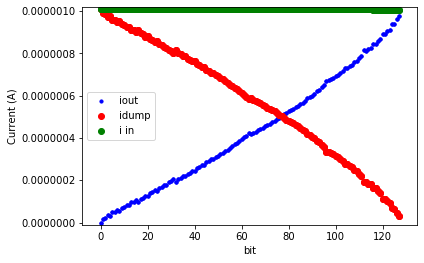

0      0.000000e+00
1      1.893634e-08
2      4.437076e-09
3      1.289571e-08
4     -3.480631e-09
           ...     
123    6.939236e-09
124    2.469942e-08
125    3.322321e-09
126    2.073279e-08
127    1.389752e-08
Name: diff, Length: 256, dtype: float64


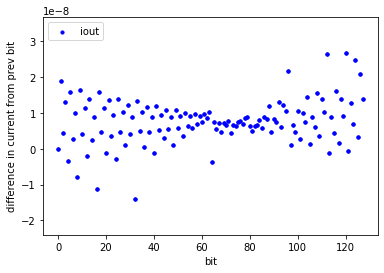

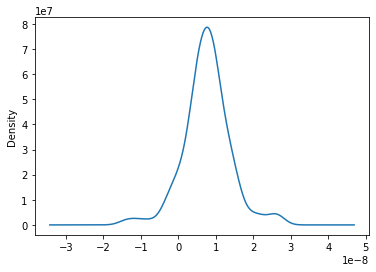

In [46]:
runs = 2
#init data with first run
data = pd.read_csv("data/mc_dac1.txt", sep=" +", engine='python')

#combine multiple runs
for i in range(1, runs):
    data = pd.concat([data, pd.read_csv("data/mc_dac" + str(i + 1)+".txt", sep=" +", engine='python')])
data.columns = ["net1", "iout", "idump", "i_in"]
data["bit"] = data.index % 128
data["diff"] = data["iout"].diff(1)

#remove diffs at bits = 0
data["diff"].loc[data["bit"] == 0] = 0
print(data.loc[data["bit"] == 0])

fig = plt.figure()
ax1 = fig.add_subplot()

ax1.scatter(data.bit, data.iout, s=10, c='b', label='iout')
ax1.scatter(data.bit, data.idump, c='r', label='idump')
ax1.scatter(data.bit, data.i_in, c='g', label='i in')
plt.ylim(data.iout.min()-1e-8, data.i_in.max()+1e-8)
# plt.xlim(60,80)
plt.legend(loc='center left');
plt.xlabel("bit")
plt.ylabel("Current (A)")
plt.show()

#plotting diffs
fig = plt.figure()
ax1 = fig.add_subplot()
print(data["diff"])
ax1.scatter(data["bit"], data["diff"], s=10, c='b', label='iout')
plt.ylim(data["diff"].min()-1e-8, data["diff"].max()+1e-8)
# plt.xlim(60,80)
plt.legend(loc='upper left');
plt.xlabel("bit")
plt.ylabel("difference in current from prev bit")
plt.show()

#density plot of diff
data["diff"].plot.density()